##  Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from warnings import filterwarnings
import string
import pickle

In [2]:
df=pd.read_csv("text_data.csv")
df.head(10)

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
5,6,Send a logo 2 ur lover - 2 names joined by a h...,Spam
6,7,FREE entry into our £250 weekly competition ju...,Spam
7,8,100 dating service cal;l 09064012103 box334sk38ch,Spam
8,9,FREE RINGTONE text FIRST to 87131 for a poly o...,Spam
9,10,4mths half price Orange line rental & latest c...,Spam


In [3]:
df.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [4]:
print(df.iloc[0]["Message_body"])
print(df.iloc[120]["Message_body"])

UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear


## Checking for Null in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        125 non-null    int64 
 1   Message_body  125 non-null    object
 2   Label         125 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [6]:
df.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [7]:
# It is clear that in the dataset there is no missing value.Now let's check how much spam and non-spam data in the dataset.

In [8]:
df['Label'].value_counts()

Spam        76
Non-Spam    49
Name: Label, dtype: int64

In [9]:
# Replacing the values of Label into computer understandable 0 and 1

In [10]:
df.loc[df['Label']=="Spam","Label"]=0
df.loc[df['Label']=="Non-Spam","Label"]=1   
df.drop(["S. No."],axis=1,inplace=True)
df

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",0
1,"Loan for any purpose £500 - £75,000. Homeowner...",0
2,Congrats! Nokia 3650 video camera phone is you...,0
3,URGENT! Your Mobile number has been awarded wi...,0
4,Someone has contacted our dating service and e...,0
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1
121,Try to do something dear. You read something f...,1
122,Sun ah... Thk mayb can if dun have anythin on....,1
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1


# Exploratory data Analysis

In [11]:
df2=df

In [12]:
message_length=[]
for message in df["Message_body"]:
    message_length.append(len(message))
df2["Message_length"]=message_length
df2

,Message_body,Label,Message_length
0,"UpgrdCentre Orange customer, you may now claim...",0,175
1,"Loan for any purpose £500 - £75,000. Homeowner...",0,162
2,Congrats! Nokia 3650 video camera phone is you...,0,157
3,URGENT! Your Mobile number has been awarded wi...,0,136
4,Someone has contacted our dating service and e...,0,162
...,...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1,151
121,Try to do something dear. You read something f...,1,54
122,Sun ah... Thk mayb can if dun have anythin on....,1,118
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1,137


Text(0.5, 0, 'Message')

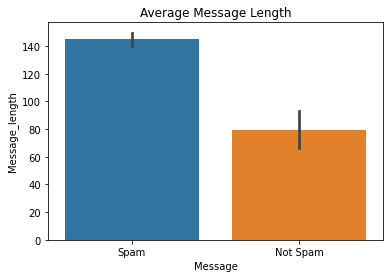

In [13]:
sns.barplot(x='Label', y='Message_length', data=df2)
plt.title("Average Message Length")
plt.xticks([1,0],['Not Spam', 'Spam'])
plt.xlabel('Message')

In [48]:
##From the barplot it can be seen that there is significant difference between the average length of spam and non-spam messages.
##For spam the lengths are generally longer than the non-spam messages.  

In [14]:
special_char=[]
for message in df["Message_body"]:
    special_char_counter=0
    for char in message:
        if not char.isalnum():
            special_char_counter+=1
    special_char.append(special_char_counter)
df2["Special_char_count"]=special_char
df2

,Message_body,Label,Message_length,Special_char_count
0,"UpgrdCentre Orange customer, you may now claim...",0,175,36
1,"Loan for any purpose £500 - £75,000. Homeowner...",0,162,38
2,Congrats! Nokia 3650 video camera phone is you...,0,157,27
3,URGENT! Your Mobile number has been awarded wi...,0,136,26
4,Someone has contacted our dating service and e...,0,162,28
...,...,...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1,151,34
121,Try to do something dear. You read something f...,1,54,10
122,Sun ah... Thk mayb can if dun have anythin on....,1,118,36
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1,137,32


Text(0.5, 0, 'Message')

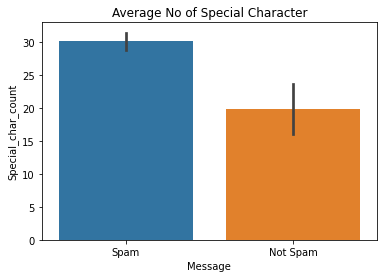

In [15]:
sns.barplot(x='Label', y='Special_char_count', data=df2)
plt.title("Average No of Special Character")
plt.xticks([1,0],['Not Spam', 'Spam'])
plt.xlabel('Message')

In [49]:
##From the barplot it can be seen that there is not much significant difference between the average no of
##special characters between spam and non-spam.

In [16]:
No_of_digit=[]
for message in df["Message_body"]:
    digit_counter=0
    for char in message:
        if char.isdigit():
            digit_counter+=1
    No_of_digit.append(digit_counter)
df2["No_of_digit"]=No_of_digit
df2

,Message_body,Label,Message_length,Special_char_count,No_of_digit
0,"UpgrdCentre Orange customer, you may now claim...",0,175,36,13
1,"Loan for any purpose £500 - £75,000. Homeowner...",0,162,38,19
2,Congrats! Nokia 3650 video camera phone is you...,0,157,27,33
3,URGENT! Your Mobile number has been awarded wi...,0,136,26,21
4,Someone has contacted our dating service and e...,0,162,28,19
...,...,...,...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1,151,34,8
121,Try to do something dear. You read something f...,1,54,10,0
122,Sun ah... Thk mayb can if dun have anythin on....,1,118,36,0
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1,137,32,3


Text(0.5, 0, 'Message')

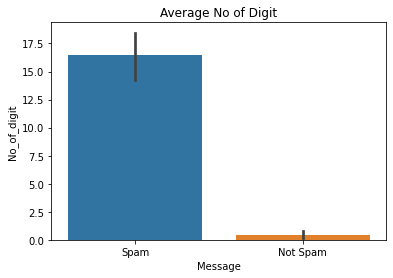

In [17]:
sns.barplot(x='Label', y='No_of_digit', data=df2)
plt.title("Average No of Digit")
plt.xticks([1,0],['Not Spam', 'Spam'])
plt.xlabel('Message')

In [51]:
##From the barplot it can be seen that there is significant difference between the average no of digits used in spam
##and non-spam messages.
##For spam the no of digits are very higher than the non-spam messages. 

# cleaning stopwords from message body

In [18]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'you', 'who', 'or', 'them', 'he', 'the', 'from', 'nor', 'whom', 'once', 'couldn', 'own', "mightn't", 'all', 'any', 'this', 'be', 'wouldn', 'yourself', 'off', 'too', "she's", "mustn't", 'being', 'do', 'by', 'what', 'a', 've', 'ain', 'my', 'below', 'up', 'out', 'into', 'there', 'have', 'aren', "needn't", 'o', 'only', 'she', "doesn't", 't', 'does', 'through', 'if', 'weren', "wasn't", 'each', 'on', 'now', 'mustn', 'ours', 'its', 'your', 'to', 'those', 'had', 'no', 'until', 'theirs', 'before', 'our', 'wasn', "wouldn't", "weren't", 'why', 'it', "hasn't", 'such', 'here', 'him', "couldn't", 'yours', 'which', "shouldn't", 'isn', 'under', 'hadn', 'same', "you'd", 'doing', 's', 'shan', 'over', 'i', "should've", 'not', 'some', 'did', "you've", "don't", 're', "it's", 'has', 'then', 'is', 'more', 'ourselves', "that'll", 'very', 'will', "isn't", 'against', 'itself', 'again', 'and', 'most', 'didn', 'of', 'they', 'these', 'haven', "you're", 'their', 'am', 'both', 'can', 'an', "you'll", 'are', 'at', 'f

In [19]:
df2['Message_body'] = df2['Message_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df2

,Message_body,Label,Message_length,Special_char_count,No_of_digit
0,"UpgrdCentre Orange customer, may claim FREE CA...",0,175,36,13
1,"Loan purpose £500 - £75,000. Homeowners + Tena...",0,162,38,19
2,Congrats! Nokia 3650 video camera phone Call 0...,0,157,27,33
3,URGENT! Your Mobile number awarded £2000 prize...,0,136,26,21
4,Someone contacted dating service entered phone...,0,162,28,19
...,...,...,...,...,...
120,7 wonders My WORLD 7th You 6th Ur style 5th Ur...,1,151,34,8
121,Try something dear. You read something exams,1,54,10,0
122,Sun ah... Thk mayb dun anythin on... Thk book ...,1,118,36,0
123,"SYMPTOMS U love: ""1.U like listening songs 2.U...",1,137,32,3


In [20]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Making a list of Spam words which can be used to identify spam from the dataset

In [21]:
text=[]
for index, row in df.iterrows():
    if row['Label'] == 0:
        temp=[]
        [temp.extend(word_tokenize(i)) for i in sent_tokenize(row["Message_body"])]
        text.extend(temp)
text

['UpgrdCentre',
 'Orange',
 'customer',
 ',',
 'may',
 'claim',
 'FREE',
 'CAMERA',
 'PHONE',
 'upgrade',
 'loyalty',
 '.',
 'Call',
 '0207',
 '153',
 '9153',
 '.',
 'Offer',
 'ends',
 '26th',
 'July',
 '.',
 'T',
 '&',
 'C',
 "'s",
 'apply',
 '.',
 'Opt-out',
 'available',
 'Loan',
 'purpose',
 '£500',
 '-',
 '£75,000',
 '.',
 'Homeowners',
 '+',
 'Tenants',
 'welcome',
 '.',
 'Have',
 'previously',
 'refused',
 '?',
 'We',
 'still',
 'help',
 '.',
 'Call',
 'Free',
 '0800',
 '1956669',
 'text',
 'back',
 "'help",
 "'",
 'Congrats',
 '!',
 'Nokia',
 '3650',
 'video',
 'camera',
 'phone',
 'Call',
 '09066382422',
 'Calls',
 'cost',
 '150ppm',
 'Ave',
 'call',
 '3mins',
 'vary',
 'mobiles',
 '16+',
 'Close',
 '300603',
 'post',
 'BCM4284',
 'Ldn',
 'WC1N3XX',
 'URGENT',
 '!',
 'Your',
 'Mobile',
 'number',
 'awarded',
 '£2000',
 'prize',
 'GUARANTEED',
 '.',
 'Call',
 '09058094455',
 'land',
 'line',
 '.',
 'Claim',
 '3030',
 '.',
 'Valid',
 '12hrs',
 'Someone',
 'contacted',
 'dating',

In [22]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
temp=[]
[temp.extend(tokenizer.tokenize(i)) for i in text]
text=temp
text 

['UpgrdCentre',
 'Orange',
 'customer',
 'may',
 'claim',
 'FREE',
 'CAMERA',
 'PHONE',
 'upgrade',
 'loyalty',
 'Call',
 '0207',
 '153',
 '9153',
 'Offer',
 'ends',
 '26th',
 'July',
 'T',
 'C',
 's',
 'apply',
 'Opt',
 'out',
 'available',
 'Loan',
 'purpose',
 '500',
 '75',
 '000',
 'Homeowners',
 'Tenants',
 'welcome',
 'Have',
 'previously',
 'refused',
 'We',
 'still',
 'help',
 'Call',
 'Free',
 '0800',
 '1956669',
 'text',
 'back',
 'help',
 'Congrats',
 'Nokia',
 '3650',
 'video',
 'camera',
 'phone',
 'Call',
 '09066382422',
 'Calls',
 'cost',
 '150ppm',
 'Ave',
 'call',
 '3mins',
 'vary',
 'mobiles',
 '16',
 'Close',
 '300603',
 'post',
 'BCM4284',
 'Ldn',
 'WC1N3XX',
 'URGENT',
 'Your',
 'Mobile',
 'number',
 'awarded',
 '2000',
 'prize',
 'GUARANTEED',
 'Call',
 '09058094455',
 'land',
 'line',
 'Claim',
 '3030',
 'Valid',
 '12hrs',
 'Someone',
 'contacted',
 'dating',
 'service',
 'entered',
 'phone',
 'fancy',
 'you',
 'To',
 'find',
 'call',
 'landline',
 '09111032124',

In [23]:
for i in range(len(text)):
    text[i]=text[i].lower()
text

['upgrdcentre',
 'orange',
 'customer',
 'may',
 'claim',
 'free',
 'camera',
 'phone',
 'upgrade',
 'loyalty',
 'call',
 '0207',
 '153',
 '9153',
 'offer',
 'ends',
 '26th',
 'july',
 't',
 'c',
 's',
 'apply',
 'opt',
 'out',
 'available',
 'loan',
 'purpose',
 '500',
 '75',
 '000',
 'homeowners',
 'tenants',
 'welcome',
 'have',
 'previously',
 'refused',
 'we',
 'still',
 'help',
 'call',
 'free',
 '0800',
 '1956669',
 'text',
 'back',
 'help',
 'congrats',
 'nokia',
 '3650',
 'video',
 'camera',
 'phone',
 'call',
 '09066382422',
 'calls',
 'cost',
 '150ppm',
 'ave',
 'call',
 '3mins',
 'vary',
 'mobiles',
 '16',
 'close',
 '300603',
 'post',
 'bcm4284',
 'ldn',
 'wc1n3xx',
 'urgent',
 'your',
 'mobile',
 'number',
 'awarded',
 '2000',
 'prize',
 'guaranteed',
 'call',
 '09058094455',
 'land',
 'line',
 'claim',
 '3030',
 'valid',
 '12hrs',
 'someone',
 'contacted',
 'dating',
 'service',
 'entered',
 'phone',
 'fancy',
 'you',
 'to',
 'find',
 'call',
 'landline',
 '09111032124',

In [24]:
from nltk.probability import FreqDist
freq_dist_of_word=FreqDist(text)
print(freq_dist_of_word)
spam_trigger_words=freq_dist_of_word.most_common(50)
spam_trigger_words

<FreqDist with 765 samples and 1568 outcomes>


[('call', 32),
 ('free', 27),
 ('txt', 22),
 ('u', 21),
 ('ur', 20),
 ('2', 19),
 ('text', 18),
 ('mobile', 16),
 ('claim', 14),
 ('4', 13),
 ('you', 12),
 ('stop', 12),
 ('now', 11),
 ('www', 10),
 ('reply', 10),
 ('1', 10),
 ('no', 10),
 ('customer', 9),
 ('t', 9),
 ('s', 9),
 ('prize', 9),
 ('send', 9),
 ('msg', 9),
 ('guaranteed', 8),
 ('service', 8),
 ('uk', 8),
 ('1000', 8),
 ('cash', 8),
 ('50', 8),
 ('c', 7),
 ('500', 7),
 ('16', 7),
 ('urgent', 7),
 ('awarded', 7),
 ('to', 7),
 ('win', 7),
 ('ringtone', 7),
 ('contact', 7),
 ('camera', 6),
 ('phone', 6),
 ('nokia', 6),
 ('find', 6),
 ('150p', 6),
 ('entry', 6),
 ('18', 6),
 ('100', 6),
 ('week', 6),
 ('code', 6),
 ('wkly', 6),
 ('i', 6)]

In [25]:
trigger_words=[]
for i in range(len(spam_trigger_words)):
    word=spam_trigger_words[i][0]
    i+=1
    trigger_words.append(word)
trigger_words    

['call',
 'free',
 'txt',
 'u',
 'ur',
 '2',
 'text',
 'mobile',
 'claim',
 '4',
 'you',
 'stop',
 'now',
 'www',
 'reply',
 '1',
 'no',
 'customer',
 't',
 's',
 'prize',
 'send',
 'msg',
 'guaranteed',
 'service',
 'uk',
 '1000',
 'cash',
 '50',
 'c',
 '500',
 '16',
 'urgent',
 'awarded',
 'to',
 'win',
 'ringtone',
 'contact',
 'camera',
 'phone',
 'nokia',
 'find',
 '150p',
 'entry',
 '18',
 '100',
 'week',
 'code',
 'wkly',
 'i']

In [26]:
trigger_words_no = []
for message in df2['Message_body']:
    trigger_words_counter = 0
    message = message.split()
    for word in message:
        if word.lower() in trigger_words:
            trigger_words_counter+=1
    trigger_words_no.append(trigger_words_counter)
df2["No_of_trigger_words"]=trigger_words_no
df2

,Message_body,Label,Message_length,Special_char_count,No_of_digit,No_of_trigger_words
0,"UpgrdCentre Orange customer, may claim FREE CA...",0,175,36,13,5
1,"Loan purpose £500 - £75,000. Homeowners + Tena...",0,162,38,19,3
2,Congrats! Nokia 3650 video camera phone Call 0...,0,157,27,33,5
3,URGENT! Your Mobile number awarded £2000 prize...,0,136,26,21,5
4,Someone contacted dating service entered phone...,0,162,28,19,5
...,...,...,...,...,...,...
120,7 wonders My WORLD 7th You 6th Ur style 5th Ur...,1,151,34,8,6
121,Try something dear. You read something exams,1,54,10,0,1
122,Sun ah... Thk mayb dun anythin on... Thk book ...,1,118,36,0,1
123,"SYMPTOMS U love: ""1.U like listening songs 2.U...",1,137,32,3,2


Text(0.5, 0, 'Message')

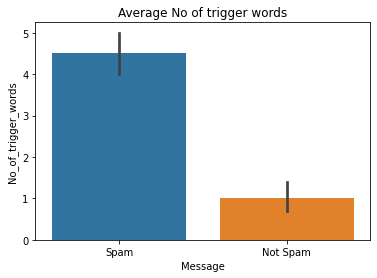

In [27]:
sns.barplot(x='Label', y='No_of_trigger_words', data=df2)
plt.title("Average No of trigger words")
plt.xticks([1,0],['Not Spam', 'Spam'])
plt.xlabel('Message')

In [55]:
##It can be seen that average no of trigger words are more in the spam messages.

# Making a corpus for the vectorization

In [28]:
import nltk 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\chandan
[nltk_data]     sarkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
corpus=[]
for message in df2['Message_body']:
    removed_tab_newline=re.sub('[\n|\t]',' ', message)
    removed_special_Char = re.sub('[^a-zA-Z0-9]',' ',removed_tab_newline)
    lower_case_message = removed_special_Char.lower()
    tokenized_message=lower_case_message.split()
    filtered_words=[word for word in tokenized_message]
    lemmatized_words=[lemmatizer.lemmatize(word) for word in filtered_words]
    msg=' '.join(lemmatized_words)
    corpus.append(msg)

In [62]:
tfidf = TfidfVectorizer(max_features=1000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()
# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df2['Label']
y=y.astype('int')

In [63]:
print(vectors.shape)
vectors

(125, 1000)


array([[0.        , 0.25061884, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19408662, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
feature_names

['000',
 '0207',
 '021',
 '03',
 '07046744435',
 '07123456789',
 '07732584351',
 '07742676969',
 '0800',
 '08000839402',
 '08000930705',
 '08000938767',
 '08002986030',
 '08002986906',
 '0808',
 '0844',
 '0845',
 '08452810075over18',
 '08700621170150p',
 '08708800282',
 '08712300220',
 '0871277810810',
 '0871277810910p',
 '08715705022',
 '08717205546',
 '08718720201',
 '087187262701',
 '08718727870150ppm',
 '08719180248',
 '09057039994',
 '09058094455',
 '09058094597',
 '09061209465',
 '09061701461',
 '09061701939',
 '09064012103',
 '09064012160',
 '09064019788',
 '09065171142',
 '09066350750',
 '09066364589',
 '09066382422',
 '09071512432',
 '09111032124',
 '10',
 '100',
 '1000',
 '1000call',
 '100percent',
 '10am',
 '10p',
 '11',
 '118p',
 '11mths',
 '11pm',
 '12',
 '125gift',
 '12hrs',
 '145',
 '150',
 '1500',
 '150p',
 '150pm',
 '150ppm',
 '150pw',
 '153',
 '16',
 '169',
 '18',
 '1956669',
 '1st',
 '1x150p',
 '20',
 '200',
 '2000',
 '2004',
 '2005',
 '21',
 '21st',
 '25',
 '250',
 

In [ ]:
#We used Naive Bayes to train our model. We chose this model because when dealing with texts, 
#we have to treat each unique word as a feature, and since the vocabulary
#is thousands of words, this makes for a large number of features. 
#This algorithm is relevant when the multiple occurrences of words are important in the classification problem. 
#The relative simplicity of the algorithm and the independent features assumption of Naive Bayes make it a strong performer 
#for classifying texts and hence we decided to use Naive Bayes classifier to classify text messages as legitimate or spam

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [68]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
print('Model score on test data:',classifier.score(X_test,y_test))

Model score on test data: 0.8421052631578947


In [69]:
cross_val_score(classifier,X_test,y_test)

array([0.75      , 0.75      , 0.625     , 0.71428571, 0.71428571])

In [70]:
y_predicted = classifier.predict(X_test)

In [78]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[27,  0],
       [ 6,  5]], dtype=int64)

In [72]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        27
           1       1.00      0.45      0.62        11

    accuracy                           0.84        38
   macro avg       0.91      0.73      0.76        38
weighted avg       0.87      0.84      0.82        38



In [74]:
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [75]:
temp=pickle.load(open(filename, 'rb'))

In [76]:
temp_predict=temp.predict(X_test)

In [77]:
confusion_matrix_result = confusion_matrix(y_test,temp_predict)
confusion_matrix_result

array([[27,  0],
       [ 6,  5]], dtype=int64)